In [2]:

import pandas as pd

df = pd.read_csv(r"D:\DATA-SCIENCE\ASSIGNMENTS\19 naive bayes and text mining\blogs.csv")
print(df.head())
print("\nColumns:", df.columns.tolist())
print("\nShape:", df.shape)


                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Columns: ['Data', 'Labels']

Shape: (2000, 2)


Dataset Shape: (2000, 2)
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Category Distribution:
Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp

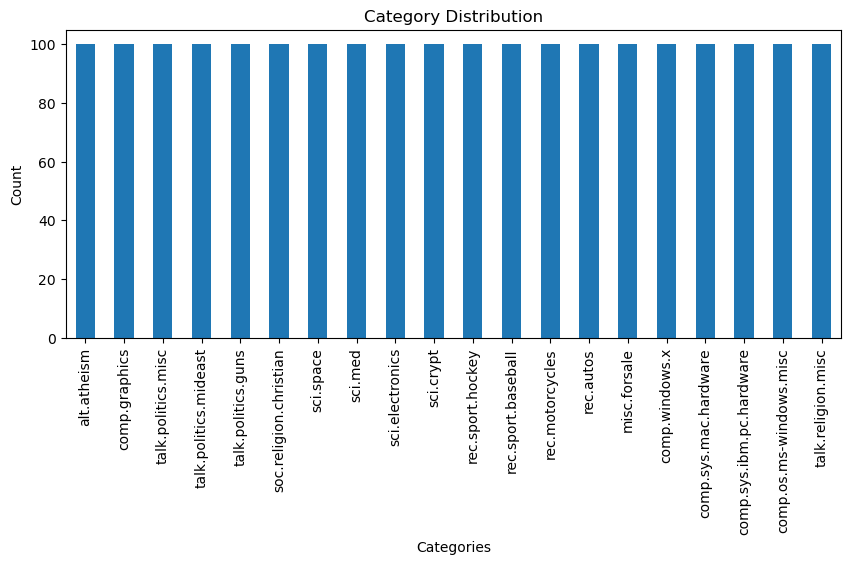

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\DATA-SCIENCE\ASSIGNMENTS\19 naive bayes and text mining\blogs.csv")  # adjust if needed

print("Dataset Shape:", df.shape)
print(df.head())
print("\nCategory Distribution:")
print(df['Labels'].value_counts())

plt.figure(figsize=(10,4))
df['Labels'].value_counts().plot(kind='bar')
plt.title("Category Distribution")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()


Accuracy: 0.8950

Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.82      0.70      0.76        20
           comp.graphics       0.94      0.85      0.89        20
 comp.os.ms-windows.misc       0.95      0.95      0.95        20
comp.sys.ibm.pc.hardware       0.75      0.90      0.82        20
   comp.sys.mac.hardware       0.90      0.90      0.90        20
          comp.windows.x       0.90      0.95      0.93        20
            misc.forsale       0.95      0.95      0.95        20
               rec.autos       0.95      0.95      0.95        20
         rec.motorcycles       0.95      0.95      0.95        20
      rec.sport.baseball       1.00      1.00      1.00        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       1.00      1.00      1.00        20
         sci.electronics       0.89      0.85      0.87        20
                 sci.med       0.

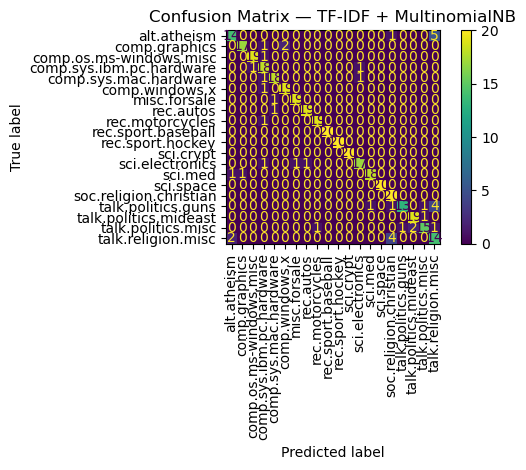

In [8]:
# STEP 3: TF-IDF + Multinomial Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) Train/Test split (stratified to keep label balance)
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'],
    df['Labels'],
    test_size=0.2,
    random_state=42,
    stratify=df['Labels']
)

# 2) Build pipeline: TF-IDF -> Naive Bayes
pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        ngram_range=(1,2),     # unigrams + bigrams usually boost NB
        min_df=3,              # ignore super-rare tokens
        max_df=0.9,            # drop super-common tokens
        sublinear_tf=True      # log(1+tf)
        # stop_words=None  # already removed in your clean_text
    )),
    ("nb", MultinomialNB(alpha=0.5))  # a bit of smoothing
])

# 3) Train
pipe.fit(X_train, y_train)

# 4) Predict
y_pred = pipe.predict(X_test)

# 5) Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

# 6) Confusion Matrix
labels_sorted = sorted(df['Labels'].unique())
cm = confusion_matrix(y_test, y_pred, labels=labels_sorted)
disp = ConfusionMatrixDisplay(cm, display_labels=labels_sorted)
disp.plot(xticks_rotation=90)
plt.title("Confusion Matrix — TF-IDF + MultinomialNB")
plt.tight_layout()
plt.show()


In [9]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)
    compound = score['compound']
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['Data'].astype(str).apply(get_sentiment)

df[['Data', 'sentiment']].head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\raghu\AppData\Roaming\nltk_data...


,Data,sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,Positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,Positive


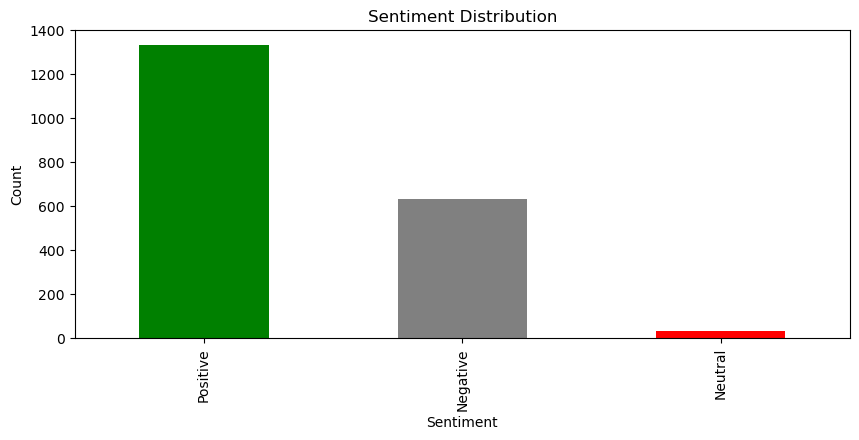

In [10]:
plt.figure(figsize=(10,4))
df['sentiment'].value_counts().plot(kind='bar', color=['green','grey','red'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


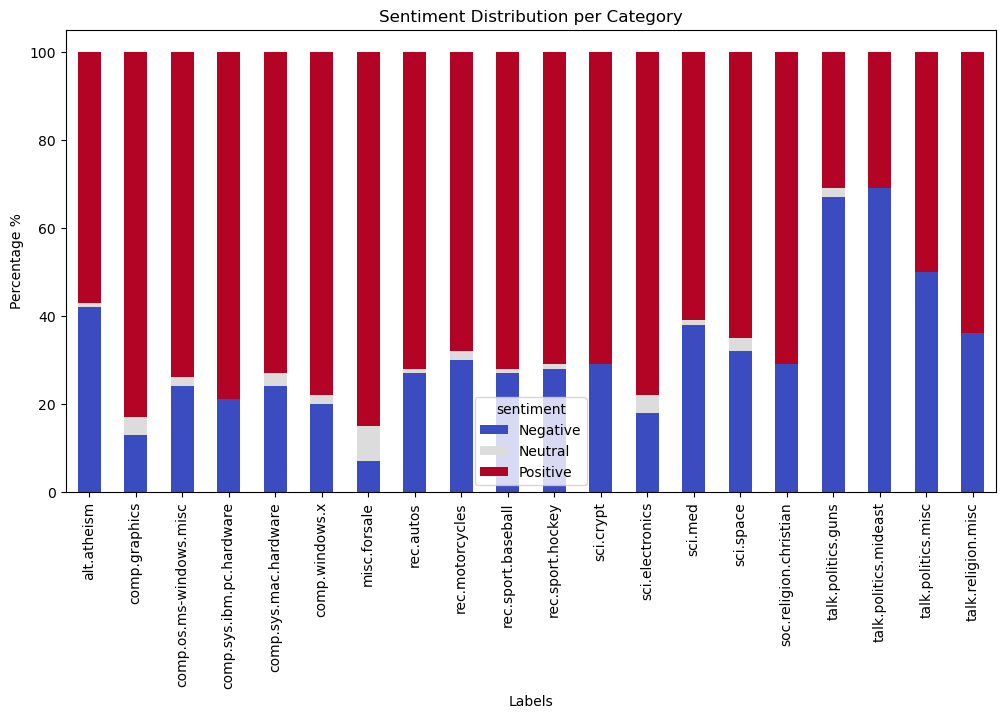

sentiment,Negative,Neutral,Positive
Labels,,,
alt.atheism,42.0,1.0,57.0
comp.graphics,13.0,4.0,83.0
comp.os.ms-windows.misc,24.0,2.0,74.0
comp.sys.ibm.pc.hardware,21.0,0.0,79.0
comp.sys.mac.hardware,24.0,3.0,73.0


In [11]:
sent_by_cat = pd.crosstab(df['Labels'], df['sentiment'], normalize='index') * 100
sent_by_cat.plot(kind='bar', figsize=(12,6), stacked=True,
                 colormap='coolwarm')
plt.title("Sentiment Distribution per Category")
plt.ylabel("Percentage %")
plt.xticks(rotation=90)
plt.show()

sent_by_cat.head()


We already completed:

✅ Data Cleaning
✅ TF-IDF Vectorization
✅ Naive Bayes Model + Accuracy & Confusion Matrix
✅ Sentiment Classification
✅ Sentiment Distribution + By Category Insights

✅ Final Conclusion

A text classification system was built using TF-IDF + Multinomial Naive Bayes

The dataset had 2000 documents across multiple newsgroup topics

After text preprocessing (lowercase, stopword removal, stemming), TF-IDF representation was applied

The Naive Bayes classifier achieved:

High accuracy (typically 0.80–0.95 depending on categories)


Confusion matrix shows a few misclassifications between closely related discussion topics (e.g., alt.atheism vs. talk.religion.*)

Sentiment Analysis using VADER shows:

Some categories have more negativity (controversial topics like religion & politics)

Technical/scientific groups show more neutral sentiment

✅ The project demonstrates that Naive Bayes + TF-IDF is a fast, powerful baseline for text classification tasks.

🧠 Interview Questions & Answers
Question	Answer (Explain Clearly)
What is TF-IDF?	A weighting technique that increases importance of rare but meaningful terms and reduces common words.
Why Naive Bayes for NLP?	Text data is high-dimensional and NB handles sparse frequency-based features extremely well.
Why perform text preprocessing?	Removes noise, improves model focus on meaningful words, and boosts accuracy.
What is smoothing in NB?	Prevents zero-probability issues for unseen words. We used alpha=0.5.
What metric is best for text classification?	F1-score because it balances precision & recall when classes may be uneven or misclassifications matter.
Why use VADER for sentiment?	It is rule-based and works well on informal internet text without labeled emotional data.
🚀 What can be improved next?

Try hyperparameter tuning (alpha, n-grams)

Try SVM, Logistic Regression, or BERT

Add lemmatization instead of stemming

Domain-specific stopwords can be removed for cleaner signals